In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install kagglehub

In [5]:
import kagglehub

In [7]:
# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: /Users/angelique/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2


In [9]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [11]:
# the supplied CSV data file is the raw_data directory
bc_data = pd.read_csv('/Users/angelique/Documents/GitHub/Capstone-2---Breast-Cancer-Tumor-Predictions/data.csv')

bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
#Call the info method on bc_data to see a summary of the data
bc_data.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [15]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#ski_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing_count = bc_data.isnull().sum()
missing_percent = 100 * bc_data.isnull().mean()
missing = pd.concat([missing_count, missing_percent], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=True)

,count,%
id,0,0.0
symmetry_worst,0,0.0
concave points_worst,0,0.0
concavity_worst,0,0.0
compactness_worst,0,0.0
smoothness_worst,0,0.0
area_worst,0,0.0
perimeter_worst,0,0.0
texture_worst,0,0.0
radius_worst,0,0.0


In [17]:
#See if radius_worst is larger than radius_mean
(bc_data.radius_mean > bc_data.radius_worst).sum()

0

In [19]:
#See if there have been any labels other than B or M in the diagnosis column
bc_data[(bc_data['diagnosis'] != 'B') & (bc_data['diagnosis'] != 'M')]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


In [21]:
#Call bc_data's `describe` method for a statistical summary of the numerical columns
#There are fewer summary stat columns than features, so displaying the transpose
#will be useful again
bc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [23]:
#Separate the data based on Benign and Malignant
bcB_data = bc_data[bc_data['diagnosis'] == 'B']
bcM_data = bc_data[bc_data['diagnosis'] == 'M']

In [25]:
#Rename columns with prefix in bc2_data and bc3_data
bcB_data.columns = [f'B_{col}' for col in bcB_data.columns]
bcM_data.columns = [f'M_{col}' for col in bcM_data.columns]

#Print head to see new column names
bcM_data.head()

,M_id,M_diagnosis,M_radius_mean,M_texture_mean,M_perimeter_mean,M_area_mean,M_smoothness_mean,M_compactness_mean,M_concavity_mean,M_concave points_mean,...,M_texture_worst,M_perimeter_worst,M_area_worst,M_smoothness_worst,M_compactness_worst,M_concavity_worst,M_concave points_worst,M_symmetry_worst,M_fractal_dimension_worst,M_Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [27]:
#Print head to see new column names
bcB_data.head()

,B_id,B_diagnosis,B_radius_mean,B_texture_mean,B_perimeter_mean,B_area_mean,B_smoothness_mean,B_compactness_mean,B_concavity_mean,B_concave points_mean,...,B_texture_worst,B_perimeter_worst,B_area_worst,B_smoothness_worst,B_compactness_worst,B_concavity_worst,B_concave points_worst,B_symmetry_worst,B_fractal_dimension_worst,B_Unnamed: 32
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,NaN
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,NaN
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,NaN
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,NaN
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,NaN


In [29]:
# Create a copy to avoid SettingWithCopyWarning
bcB_data = bcB_data.copy()  
#Drop the 'id' and 'Unnamed' column from bcB_data. Use inplace=True
bcB2_data = bcB_data.drop(columns=['B_id', 'B_Unnamed: 32'])

# Create a copy for the other DataFrame
bcM_data = bcM_data.copy()  
#Drop the 'id' and 'Unnamed' column from bcB_data. Use inplace=True
bcM2_data = bcM_data.drop(columns=['M_id', 'M_Unnamed: 32'])

In [31]:
#Find the descriptions of each of the data sets
bcB3_data = bcB2_data.describe().T
print(bcB3_data)

                           count        mean         std         min  \
B_radius_mean              357.0   12.146524    1.780512    6.981000   
B_texture_mean             357.0   17.914762    3.995125    9.710000   
B_perimeter_mean           357.0   78.075406   11.807438   43.790000   
B_area_mean                357.0  462.790196  134.287118  143.500000   
B_smoothness_mean          357.0    0.092478    0.013446    0.052630   
B_compactness_mean         357.0    0.080085    0.033750    0.019380   
B_concavity_mean           357.0    0.046058    0.043442    0.000000   
B_concave points_mean      357.0    0.025717    0.015909    0.000000   
B_symmetry_mean            357.0    0.174186    0.024807    0.106000   
B_fractal_dimension_mean   357.0    0.062867    0.006747    0.051850   
B_radius_se                357.0    0.284082    0.112570    0.111500   
B_texture_se               357.0    1.220380    0.589180    0.360200   
B_perimeter_se             357.0    2.000321    0.771169    0.75

In [33]:
#Find the descriptions of each of the data sets
bcM3_data = bcM2_data.describe().T
print(bcM3_data)

                           count         mean         std         min  \
M_radius_mean              212.0    17.462830    3.203971   10.950000   
M_texture_mean             212.0    21.604906    3.779470   10.380000   
M_perimeter_mean           212.0   115.365377   21.854653   71.900000   
M_area_mean                212.0   978.376415  367.937978  361.600000   
M_smoothness_mean          212.0     0.102898    0.012608    0.073710   
M_compactness_mean         212.0     0.145188    0.053987    0.046050   
M_concavity_mean           212.0     0.160775    0.075019    0.023980   
M_concave points_mean      212.0     0.087990    0.034374    0.020310   
M_symmetry_mean            212.0     0.192909    0.027638    0.130800   
M_fractal_dimension_mean   212.0     0.062680    0.007573    0.049960   
M_radius_se                212.0     0.609083    0.345039    0.193800   
M_texture_se               212.0     1.210915    0.483178    0.362100   
M_perimeter_se             212.0     4.323929    2.

In [35]:
#Rename columns with prefix in bcB3_data and bcM3_data
bcB3_data.columns = [f'B_{col}' for col in bcB3_data.columns]
bcM3_data.columns = [f'M_{col}' for col in bcM3_data.columns]

In [37]:
#Print head to see new column names
bcB3_data.head()

,B_count,B_mean,B_std,B_min,B_25%,B_50%,B_75%,B_max
B_radius_mean,357.0,12.146524,1.780512,6.98100,11.08000,12.20000,13.3700,17.8500
B_texture_mean,357.0,17.914762,3.995125,9.71000,15.15000,17.39000,19.7600,33.8100
B_perimeter_mean,357.0,78.075406,11.807438,43.79000,70.87000,78.18000,86.1000,114.6000
B_area_mean,357.0,462.790196,134.287118,143.50000,378.20000,458.40000,551.1000,992.1000
B_smoothness_mean,357.0,0.092478,0.013446,0.05263,0.08306,0.09076,0.1007,0.1634


In [39]:
#Change index to add row names as a column
bcB3_reset = bcB3_data.reset_index()
bcB3_reset.head()

,index,B_count,B_mean,B_std,B_min,B_25%,B_50%,B_75%,B_max
0,B_radius_mean,357.0,12.146524,1.780512,6.98100,11.08000,12.20000,13.3700,17.8500
1,B_texture_mean,357.0,17.914762,3.995125,9.71000,15.15000,17.39000,19.7600,33.8100
2,B_perimeter_mean,357.0,78.075406,11.807438,43.79000,70.87000,78.18000,86.1000,114.6000
3,B_area_mean,357.0,462.790196,134.287118,143.50000,378.20000,458.40000,551.1000,992.1000
4,B_smoothness_mean,357.0,0.092478,0.013446,0.05263,0.08306,0.09076,0.1007,0.1634


In [41]:
#Change index to add row names as a column
bcM3_reset = bcM3_data.reset_index()
bcM3_reset.head()

,index,M_count,M_mean,M_std,M_min,M_25%,M_50%,M_75%,M_max
0,M_radius_mean,212.0,17.462830,3.203971,10.95000,15.07500,17.3250,19.590000,28.1100
1,M_texture_mean,212.0,21.604906,3.779470,10.38000,19.32750,21.4600,23.765000,39.2800
2,M_perimeter_mean,212.0,115.365377,21.854653,71.90000,98.74500,114.2000,129.925000,188.5000
3,M_area_mean,212.0,978.376415,367.937978,361.60000,705.30000,932.0000,1203.750000,2501.0000
4,M_smoothness_mean,212.0,0.102898,0.012608,0.07371,0.09401,0.1022,0.110925,0.1447


In [43]:
#Rename the index's
bcB3_reset.rename(columns={'index': 'B_index'}, inplace=True)
bcM3_reset.rename(columns={'index': 'M_index'}, inplace=True)

In [45]:
# Concatenate horizontally
bc_data_desc = pd.concat([bcB3_reset, bcM3_reset], axis=1)

print(bc_data_desc)

                      B_index  B_count      B_mean       B_std       B_min  \
0               B_radius_mean    357.0   12.146524    1.780512    6.981000   
1              B_texture_mean    357.0   17.914762    3.995125    9.710000   
2            B_perimeter_mean    357.0   78.075406   11.807438   43.790000   
3                 B_area_mean    357.0  462.790196  134.287118  143.500000   
4           B_smoothness_mean    357.0    0.092478    0.013446    0.052630   
5          B_compactness_mean    357.0    0.080085    0.033750    0.019380   
6            B_concavity_mean    357.0    0.046058    0.043442    0.000000   
7       B_concave points_mean    357.0    0.025717    0.015909    0.000000   
8             B_symmetry_mean    357.0    0.174186    0.024807    0.106000   
9    B_fractal_dimension_mean    357.0    0.062867    0.006747    0.051850   
10                B_radius_se    357.0    0.284082    0.112570    0.111500   
11               B_texture_se    357.0    1.220380    0.589180  

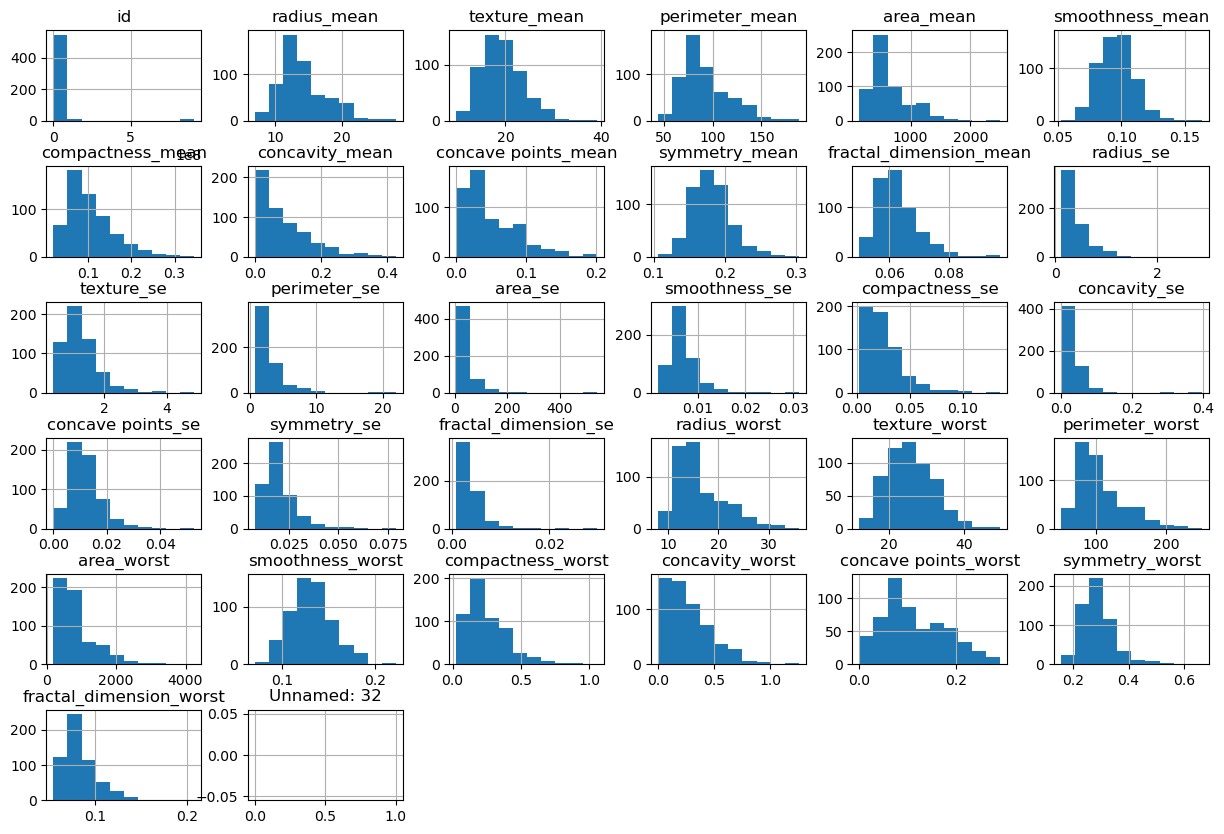

In [47]:
#Call bc_data_desc's `hist` method to plot histograms of each of the numeric features
#Try passing it an argument figsize=(15,10)
#Try calling plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
bc_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);


In [49]:
#Drop the 'Unnamed' column from bc_data. Use inplace=True
bc_data = bc_data.drop(columns=['Unnamed: 32'], inplace = True)